# 1_Analysis  ---  Final Project

 **Theme - **
- To find which city has the highest temperature difference day in the last 5 years from 2012 to 2016 and what is it's peak difference. This analysis explains how the temperature changes to its extreme on the same day itslef.
- *It includes*
- To find the highest recorded temperature on each city 
- To find the lowest recored temperature on each city
- To find which city has high temperature difference and analyze, which particular day faces the highest difference in temperature.
- These outputs are transfered to CSV files and graphs are ploted using Seaborn

In [2]:
# Getting the data from generated CSV file and storing it in dataframe, respective to the cities
import csv
import pandas as pd
from pandas import DataFrame
df_Boston = pd.read_csv(r'data\weather_csvfiles\Boston.csv')
df_Duluth = pd.read_csv(r'data\weather_csvfiles\Duluth.csv')
df_New_York = pd.read_csv(r'data\weather_csvfiles\New_York.csv')
df_Orlando = pd.read_csv(r'data\weather_csvfiles\Orlando.csv')
df_San_Francisco = pd.read_csv(r'data\weather_csvfiles\San_Francisco.csv')

In [3]:
# Getting the highest recorded temperature for the city Boston
df_Boston_maxtemp = DataFrame(df_Boston.sort_values(by=['maxtempi'],ascending = False).reset_index()['maxtempi']).head(1)
df_Boston_maxtemp['city'] = 'Boston'
df_Boston_maxtemp

,maxtempi,city
0,99,Boston


In [4]:
# Getting the highest recorded temperature for the city Duluth
df_Duluth_maxtemp = DataFrame(df_Duluth.sort_values(by=['maxtempi'],ascending = False).reset_index()['maxtempi']).head(1)
df_Duluth_maxtemp['city'] = 'Duluth'
df_Duluth_maxtemp

,maxtempi,city
0,93.0,Duluth


In [5]:
# Getting the highest recorded temperature for the city New_York
df_New_York_maxtemp = DataFrame(df_New_York.sort_values(by=['maxtempi'],ascending = False).reset_index()['maxtempi']).head(1)
df_New_York_maxtemp['city'] = 'New_York'
df_New_York_maxtemp

,maxtempi,city
0,100,New_York


In [6]:
# Getting the highest recorded temperature for the city Orlando
df_Orlando_maxtemp = DataFrame(df_Orlando.sort_values(by=['maxtempi'],ascending = False).reset_index()['maxtempi']).head(1)
df_Orlando_maxtemp['city'] = 'Orlando'
df_Orlando_maxtemp

,maxtempi,city
0,98,Orlando


In [7]:
# Getting the highest recorded temperature for the city San_Francisco
df_San_Francisco_maxtemp = DataFrame(df_San_Francisco.sort_values(by=['maxtempi'],ascending = False).reset_index()['maxtempi']).head(1)    
df_San_Francisco_maxtemp['city'] = 'San_Francisco'
df_San_Francisco_maxtemp

,maxtempi,city
0,95,San_Francisco


In [8]:
# Joining all the city's high temperature dataframe together as single dataframe
frames = [df_Boston_maxtemp, df_Duluth_maxtemp, df_New_York_maxtemp, df_Orlando_maxtemp, df_San_Francisco_maxtemp]
df_frames = pd.concat(frames).reset_index()
df_maxtemp = df_frames.drop('index',1)
df_maxtemp

,maxtempi,city
0,99.0,Boston
1,93.0,Duluth
2,100.0,New_York
3,98.0,Orlando
4,95.0,San_Francisco


In [9]:
# Getting the lowest recorded temperature for the city Boston
df_Boston_mintemp = DataFrame(df_Boston.sort_values(by=['mintempi'],ascending = True).reset_index()['mintempi']).head(1)
df_Boston_mintemp['city'] = 'Boston'
df_Boston_mintemp

,mintempi,city
0,-9,Boston


In [10]:
# Getting the lowest recorded temperature for the city Duluth
df_Duluth_mintemp = DataFrame(df_Duluth.sort_values(by=['mintempi'],ascending = True).reset_index()['mintempi']).head(1)
df_Duluth_mintemp['city'] = 'Duluth'
df_Duluth_mintemp

,mintempi,city
0,-27.0,Duluth


In [11]:
# Getting the lowest recorded temperature for the city New_York
df_New_York_mintemp = DataFrame(df_New_York.sort_values(by=['mintempi'],ascending = True).reset_index()['mintempi']).head(1)
df_New_York_mintemp['city'] = 'New_York'
df_New_York_mintemp

,mintempi,city
0,-1,New_York


In [12]:
# Getting the lowest recorded temperature for the city Orlando
df_Orlando_mintemp = DataFrame(df_Orlando.sort_values(by=['mintempi'],ascending = True).reset_index()['mintempi']).head(1)
df_Orlando_mintemp['city'] = 'Orlando'
df_Orlando_mintemp

,mintempi,city
0,0,Orlando


In [13]:
# Getting the lowest recorded temperature for the city San_Francisco
df_San_Francisco_mintemp = DataFrame(df_San_Francisco.sort_values(by=['mintempi'],ascending = True).reset_index()['mintempi']).head(1)
df_San_Francisco_mintemp['city'] = 'San_Francisco'
df_San_Francisco_mintemp

,mintempi,city
0,-25,San_Francisco


In [14]:
# Joining all the city's low temperature dataframe together as single dataframe
frames2 = [df_Boston_mintemp, df_Duluth_mintemp, df_New_York_mintemp, df_Orlando_mintemp, df_San_Francisco_mintemp]
df_frames2 = pd.concat(frames2).reset_index()
df_mintemp = df_frames2.drop('index',1)
df_mintemp

,mintempi,city
0,-9.0,Boston
1,-27.0,Duluth
2,-1.0,New_York
3,0.0,Orlando
4,-25.0,San_Francisco


In [15]:
# Merging the high and low temperature together 
df_minmax_temp = pd.merge(df_maxtemp, df_mintemp, on='city')[['city','maxtempi','mintempi']]
df_minmax_temp

,city,maxtempi,mintempi
0,Boston,99.0,-9.0
1,Duluth,93.0,-27.0
2,New_York,100.0,-1.0
3,Orlando,98.0,0.0
4,San_Francisco,95.0,-25.0


In [16]:
# writing the maximum and minimum temperature data for each city to CSV file 
import os
if not os.path.exists('Output/1_Analysis/City_Temperature'):
        os.makedirs('Output/1_Analysis/City_Temperature')
df_minmax_temp.to_csv('Output/1_Analysis/City_Temperature/City_Temperature.csv', index=False)

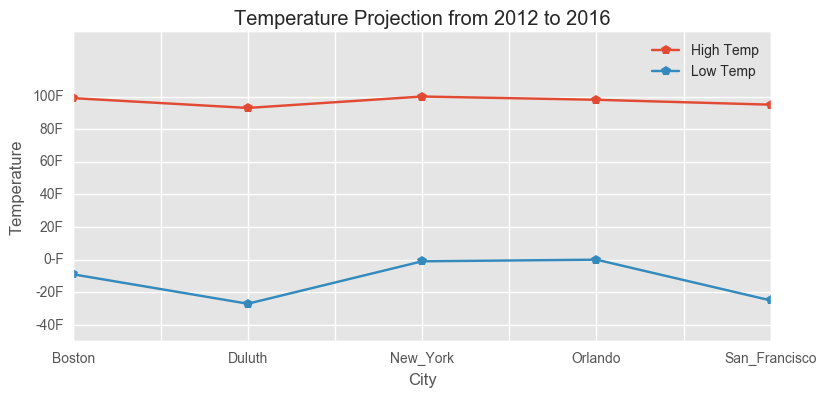

In [17]:
#Plotting graph for all cities to display the high and low temperature 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(9,4))
plt.xlabel('City')
plt.ylabel('Temperature')
plt.title('Temperature Projection from 2012 to 2016')
plt.plot(df_minmax_temp['maxtempi'],'-p', label = 'High Temp')
plt.plot(df_minmax_temp['mintempi'],'-p',label = 'Low Temp')
plt.yticks([-50,-40,-20, 0, 20, 40, 60, 80, 100, 140], ['','-40F','-20F', '0-F', '20F', '40F', '60F', '80F', '100F', ''])
plt.xticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],['Boston','', 'Duluth', '', 'New_York', '', 'Orlando', '', 'San_Francisco'] )
plt.legend()
plt.show()

**Description**
- From the above graph it is clearly seen that there is maximum temperature difference is on the city San_Francisco from California. The next analyzation will be on the city San_Francisco

In [18]:
# For the city San_Francisco the temperature difference on each day is taken and added in a new column
df_San_Francisco_tempdiff = df_San_Francisco[['maxtempi','mintempi','year','mon']]
df_San_Francisco_tempdiff['temp_diff'] = df_San_Francisco.loc[:,('maxtempi')].sub(df_San_Francisco.loc[:,('mintempi')])
df_San_Francisco_tempdiff.head()

C:\Users\Malick\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,maxtempi,mintempi,year,mon,temp_diff
0,57,48,2012,4,9
1,63,45,2012,4,18
2,64,49,2012,4,15
3,57,46,2012,4,11
4,55,44,2012,4,11


In [19]:
# Only required selected for finding the day with maximum temperature difference 
#Converted the month digit to name
import calendar
df_San_Francisco_tempdiff_mon = pd.DataFrame(df_San_Francisco_tempdiff.groupby(['year','mon'])['temp_diff'].max()).reset_index()
df_San_Francisco_tempdiff_mon['mon'] = df_San_Francisco_tempdiff_mon['mon'].apply(lambda x: calendar.month_name[x])
df_San_Francisco_tempdiff_mon.head()

,year,mon,temp_diff
0,2012,January,26
1,2012,February,23
2,2012,March,28
3,2012,April,24
4,2012,May,32


In [20]:
# writing the maximum and minimum temperature data for each city to CSV file 
import os
if not os.path.exists('Output/1_Analysis/Yearmonth_Temperature'):
        os.makedirs('Output/1_Analysis/Yearmonth_Temperature')
df_San_Francisco_tempdiff_mon.to_csv('Output/1_Analysis/Yearmonth_Temperature/Yearmonth_Temperature.csv', index=False)

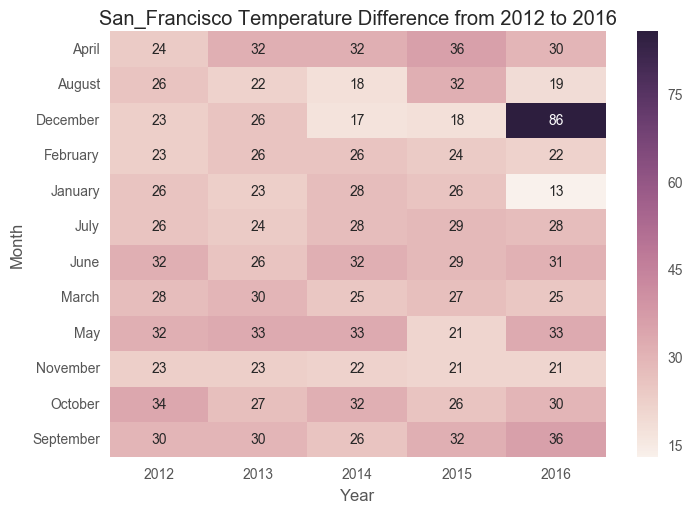

In [22]:
# Generated a seaborn graph to display the selected day from a month which has the highest temperature difference 
import numpy as np; np.random.seed(0)
import seaborn as sns
result = df_San_Francisco_tempdiff_mon.pivot(index='mon', columns='year', values='temp_diff')
ax = sns.heatmap(result, annot=True, fmt="g",)
ax.set(xlabel='Year', ylabel='Month')
plt.title('San_Francisco Temperature Difference from 2012 to 2016')
plt.show() 

**Description**
- The seaborn heatmap graph represents that there is a day in December 2016 with hugh temperature difference with the maximum of 86'F difference.

# Conclusion
- As a result of this analysis, it is concluded that there an unbelievable temperature difference in a day at December 2016 in the city San_Francisco which is 86'F.